# 📰**Fake News Detection**

## 🧩**Problem Description**

The advent of digital platforms in the 21st century has made information easily accessible to people across the globe. However, this convenience has also led to the emergence of fake news, which can spread rumors and deceive the public. Detecting fake news is crucial for news or media organizations to maintain their credibility as a reliable source of information.
In this scenario, Data Scientist who works in News's Data Analytics division, their primary responsibility is to develop a highly accurate Machine Learning model that can effectively identify fake news articles from a compiled numerical dataset.

## 🎯**Objective**

The objective is to create a machine learning model that can identify fake news articles. However, instead of relying on the text of these articles, we will use a tabular dataset that includes metadata-level information about each article. This dataset will contain both genuine and fake news articles. The machine learning model will be responsible for accurately distinguishing between the real news articles and the fake ones based on parameters such as word count, average word length, number of sentences, and number of unique words.
- Loading and understanding the dataset of labeled news articles.
- Cleaning and preprocessing the text data to prepare it for modeling.
- Training a Random Forest classifier to distinguish between fake and real news.
- Optimizing the model using `GridSearchCV` for hyperparameter tuning.
- Evaluating the model using metrics such as accuracy, precision, recall

## **Load Libraries**

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **Reading the dataset**

In [27]:
#Loading the dataset
df = pd.read_csv("Fake News Detection Dataset.csv")

In [28]:
df.head()

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
0,1606,10,4,24,6.176750,1
1,3718,10,8,25,5.826770,1
2,2634,10,7,18,4.619040,1
3,5560,10,6,18,4.961424,1
4,7494,10,4,21,4.114324,1


In [29]:
df.tail()

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
4495,1179,41,7,12,6.963924,0
4496,9445,100,5,15,3.136755,1
4497,4149,100,8,18,3.376823,1
4498,9877,85,14,42,5.331393,0
4499,6709,57,6,7,4.312751,0


In [30]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4500 non-null   int64  
 1   Word_Count           4500 non-null   int64  
 2   Number_of_Sentence   4500 non-null   int64  
 3   Unique_Words         4500 non-null   int64  
 4   Average_Word_Length  4500 non-null   float64
 5   Label                4500 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 211.1 KB


- The data types of the columns vary. Five of the columns are of the int64 data type, which is typically used for integer values. However, the "Average_Word_Length" column is of the only float64 data type, suggesting that it contains decimal values.

- The "Non-Null Count" indicates that all 6 columns have 4500 non-null entries. **So there are no missing values in any of the columns.**

In [31]:
print(f"This dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


This dataset contains 4500 rows and 6 columns.


## **Summary Statistics**

In [32]:
df.describe()

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,5469.140000,53.934000,8.934667,24.943333,4.968105,0.329556
std,2599.193059,24.872743,3.407847,11.540708,1.152394,0.470104
min,1002.000000,10.000000,4.000000,5.000000,3.000385,0.000000
25%,3228.750000,35.000000,6.000000,17.000000,3.980553,0.000000
50%,5449.500000,52.000000,9.000000,22.000000,4.906200,0.000000
75%,7706.750000,75.000000,12.000000,33.000000,5.996111,1.000000
max,9999.000000,100.000000,15.000000,50.000000,6.999799,1.000000


- The mean of "Word_Count" is 53.934, and "Number_of_sentence" is 8.93.

- The median (50%) of "Unique_Words" is 22, indicating that half of the data points have unique word counts below this value.

- The maximum Number_of_sentence is 15.

- The maximum count of unique words in a sentence is 50. This means that there is a sentence with a vocabulary of 50 distinct words.



## **Exploratory Data Analysis (EDA)**

C:\Users\muhammad talha\AppData\Local\Temp\ipykernel_7936\1386547661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Label', data=df, palette={'0': 'skyblue', '1': 'salmon'})


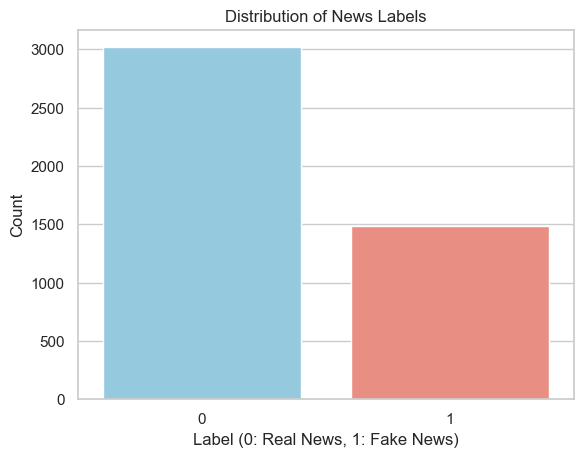

In [33]:
# Plotting the distribution of labels
ax = sns.countplot(x='Label', data=df, palette={'0': 'skyblue', '1': 'salmon'})

# Adding labels and title
plt.xlabel('Label (0: Real News, 1: Fake News)')
plt.ylabel('Count')
plt.title('Distribution of News Labels')
plt.show()

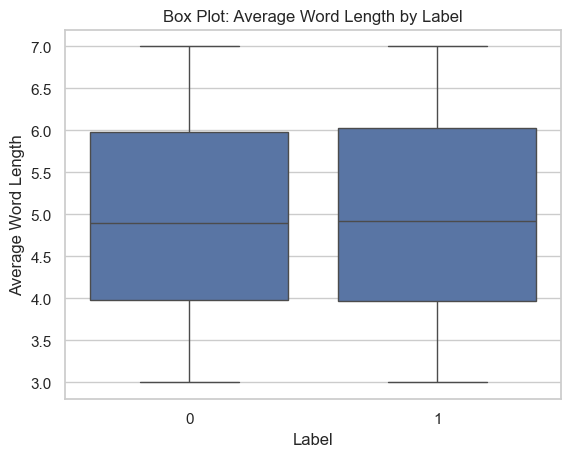

In [34]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create a bar plot
sns.boxplot(x="Label", y="Average_Word_Length", data=df)
plt.title("Box Plot: Average Word Length by Label")
plt.xlabel("Label")
plt.ylabel("Average Word Length")
plt.show()

From this plot, **The average word length variable is similarly distributed in real and fake news.**

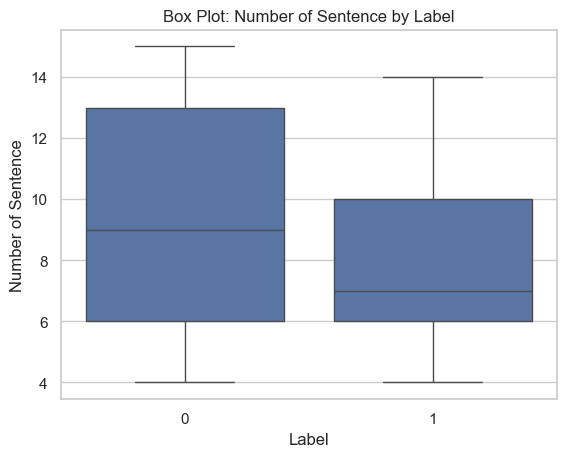

In [35]:
sns.boxplot(x="Label", y="Number_of_Sentence", data=df)
plt.title("Box Plot: Number of Sentence by Label")
plt.xlabel("Label")
plt.ylabel("Number of Sentence")
plt.show()

Real news articles (Label 0) have an average of around 9 sentences per article, while fake news articles (Label 1) have a slightly lower average of about 7 sentences. This suggests that, on average, real news articles tend to have a higher number of sentences compared to fake news articles - which seems plausible.

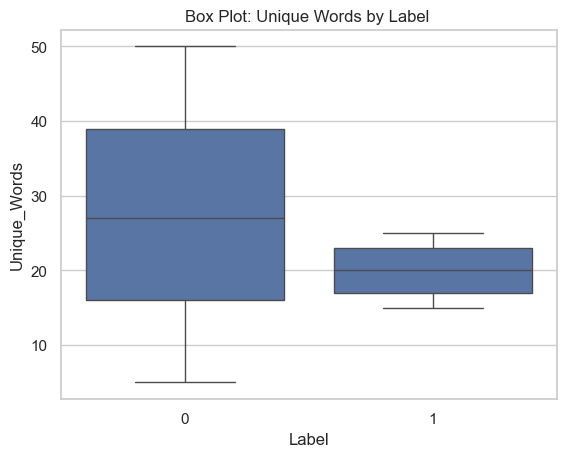

In [36]:
sns.boxplot(x="Label", y="Unique_Words", data=df)
plt.title("Box Plot: Unique Words by Label ")
plt.xlabel("Label")
plt.ylabel("Unique_Words")
plt.show()

- On average, real news articles tend to have a higher number of unique words compared to fake news articles - an insight that could be important to keep track of.

- The minimum number of unique words is less than 10 for real news and 15 for fake news. The maximum number of unique words is 50 for real news and 25 for fake news. **This indicates that real news articles can have a larger variety in the number of unique words compared to fake news articles.**

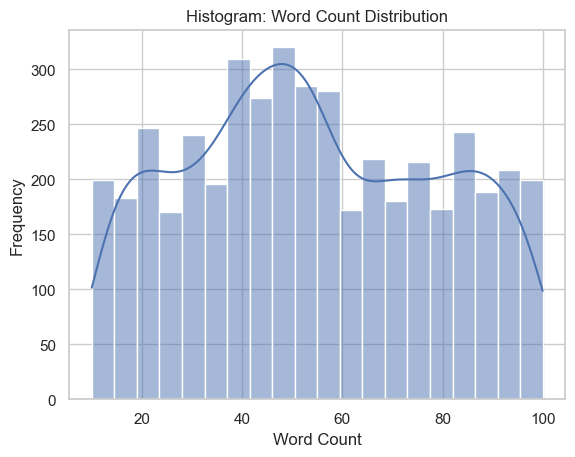

In [37]:
# Create a histogram
sns.histplot(data=df, x="Word_Count", bins=20, kde=True)
plt.title("Histogram: Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


- Upon analyzing the histogram, it appears that most articles have a word count that falls between the range of 30 to 60 words. This specific range is responsible for the highest frequency of articles.

- However, there are some articles whose word counts deviate from this expected range. The histogram's "tails" on both ends indicate that articles with very low or very high word counts are contributing to the overall dispersion.

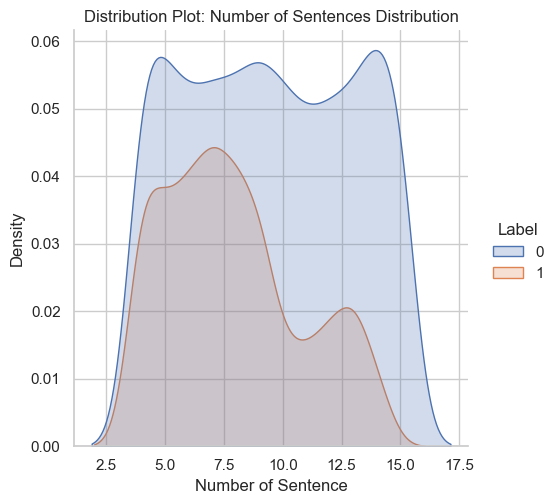

In [38]:
# Create a distribution plot
sns.displot(df, x="Number_of_Sentence", hue="Label", kind="kde", fill=True)
plt.title("Distribution Plot: Number of Sentences Distribution")
plt.xlabel("Number of Sentence")
plt.ylabel("Density")
plt.show()

-  **It has been observed that both real news (Label 0) and fake news (Label 1) exhibit three separate peaks in the KDE curves.** - A smooth line for each class (real/fake) showing how sentence counts are distributed.
- If both distributions are very different, it might indicate that sentence length is useful for classifying the news.

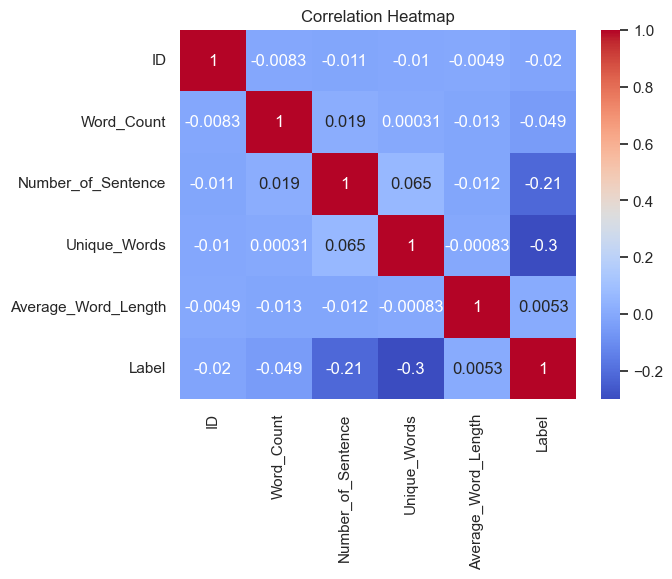

In [39]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Insights from the Correlation Heatmap**

- **The correlation between "Word_Count" and the "Label" is approximately -0.0489.**  The data shows that there is a weak negative correlation between the number of words in an article and whether it is real or fake news. 

- Similarly,**The correlation between "Number_of_Sentence" and the "Label" is approximately -0.21.**  There is a moderate negative correlation between the number of sentences in an article and whether it is a fake news article or not. 

- **The correlation between "Unique_Words" and the "Label" is approximately -0.3.** The correlation between unique words and the label is also moderate and negative, suggesting that fake news articles tend to use fewer unique words compared to real news articles. This could be an important feature for classification.

- However, most of the other pairs of variables show no or very low correlation, indicating no strong linear relationships between them.

## **Model Building**

To build a Machine Learning model with a Random Forest algorithm, we need to follow the below steps:

1. The first step is to split dataset into training and testing subsets. This is important to train the model on one portion of the data and evaluate its performance on another. A common split ratio is around 70-80% for training and 20-30% for testing. This prevents overfitting and helps assess the model's generalization ability.

2. The second step is to create an instance of the RandomForestClassifier class. Set hyperparameters like the number of trees in the forest, the max depth of trees, and other relevant parameters.

3. Next, fit the RandomForestClassifier to the training data using the `.fit()` method. This step involves building a collection of decision trees through the random selection of features and observations.

4. Finally, evaluate the model's performance on the testing data using appropriate metrics like accuracy, precision, recall, F1-score, etc. This step helps to understand how well the model generalizes to unseen data.

In [40]:
# Separate features (X) and target variable (y)
X = df.drop(['Label',"ID"], axis=1)
y = df['Label']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [41]:
# Train the RandomForest model
rf_model = RandomForestClassifier(n_estimators =150,max_depth =5,random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [42]:
# Make predictions on the train data using the trained model
y_train_pred = rf_model.predict(X_train)

In [43]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on test data: 0.8903703703703704
Confusion Matrix:
 [[750 148]
 [  0 452]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91       898
           1       0.75      1.00      0.86       452

    accuracy                           0.89      1350
   macro avg       0.88      0.92      0.88      1350
weighted avg       0.92      0.89      0.89      1350



The Random Forest model has shown promising results with an accuracy score of 89.04% in predicting the correct labels on the test data. This indicates that the model is making precise predictions for a significant portion of the test dataset.

The high accuracy score suggests that the model is effectively capturing vital patterns and relationships present in the training data. It demonstrates a good level of generalization to unseen data, which is a fundamental goal of machine learning.

In [44]:
# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9104761904761904
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       898
           1       0.77      1.00      0.87       452

    accuracy                           0.90      1350
   macro avg       0.88      0.92      0.89      1350
weighted avg       0.92      0.90      0.90      1350



## **Insights**

The model accurately predicted 749 instances as real news (Label 0), which means these were articles that were genuinely real, and the model correctly identified them. However, there were 149 instances where the model mistakenly predicted fake news (Label 1), but they were genuinely real news (Label 0). These are instances where the model made an incorrect prediction of fake news.

The model correctly predicted fake news (Label 1) in 452 instances. These were articles that were actually fake, and the model accurately identified them. Interestingly, there were no instances where the model predicted real news (Label 0), but they were actually fake news (Label 1). This means the model did not miss any fake news articles in this particular evaluation.

Overall, the model's performance is quite good, with a high proportion of true positives and true negatives compared to false positives. This suggests that the model is making accurate predictions and has a balanced classification performance.



### ✅ Conclusion
In this project, a Random Forest model was successfully trained to classify news articles as real or fake. By applying `GridSearchCV`, the model's performance was further improved, leading to more reliable predictions. The results indicate that machine learning can effectively assist in identifying fake news, with potential applications in media monitoring and social media platforms. Future improvements could include using deep learning models and more complex text embeddings to enhance accuracy.

**Overall, the model's performance is quite good, with a high proportion of true positives and true negatives compared to false positives.** This suggests that the model is making accurate predictions and has a balanced classification performance.

